In [1]:
from __future__ import absolute_import
from __future__  import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import cv2
import numpy as np
import os
from PIL import Image
from io import BytesIO
import time

import getpass
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wget

%matplotlib inline

In [2]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

            
data = [] 
conversation = "whatsappchat.txt"
parsedData = []
with open(conversation, encoding="utf-8") as fp:
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
            
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df["Date"] = pd.to_datetime(df["Date"])
df.drop(df.head(1).index, inplace=True)
df.head()

,Date,Time,Author,Message
1,2021-04-04,12:04 pm,Mandar K,Indian army is great😃
2,2021-04-04,12:04 pm,Mandar K,Army is powerful
3,2021-04-04,12:04 pm,Mandar K,🇮🇳🇮🇳🇮🇳
4,2021-04-04,12:07 pm,Mandar K,Kartikey will join Indian Air force
5,2021-04-04,12:07 pm,Mandar K,Army recruitment is a tough process


In [5]:
df['Author'].unique() 

array(['Mandar K', 'Vit Om Kakde', 'Vit Kd', None], dtype=object)

In [6]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
total_messages = df["Message"].count()
print(media_messages)
def split_count(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
            if emoji.emoji_lis(word):
                emoji_list.append(emoji.emoji_lis(word)[0]["emoji"])
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("What's app analysis")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

0
24
What's app analysis
Messages: 50
Media: 0
Emojis: 24
Links: 1


In [7]:
df.head()

,Date,Time,Author,Message,emoji,urlcount
1,2021-04-04,12:04 pm,Mandar K,Indian army is great😃,[😃],0
2,2021-04-04,12:04 pm,Mandar K,Army is powerful,[],0
3,2021-04-04,12:04 pm,Mandar K,🇮🇳🇮🇳🇮🇳,"[🇮🇳, 🇮🇳, 🇮🇳]",0
4,2021-04-04,12:07 pm,Mandar K,Kartikey will join Indian Air force,[],0
5,2021-04-04,12:07 pm,Mandar K,Army recruitment is a tough process,[],0


In [8]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = df["Author"].unique()
for i in range(len(l)):
    req_df= messages_df[messages_df["Author"] == l[i]]
    print(f'Stats of {l[i]} -')
    print('Messages Sent', req_df.shape[0])
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    links = sum(req_df["urlcount"])   
    print('Links Sent', links)   
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 6 columns):
Date        50 non-null datetime64[ns]
Time        50 non-null object
Author      49 non-null object
Message     50 non-null object
emoji       50 non-null object
urlcount    50 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.7+ KB
Stats of Mandar K -
Messages Sent 27
Words per message 6.62962962962963
Media Messages Sent 0
Emojis Sent 21
Links Sent 0

Stats of Vit Om Kakde -
Messages Sent 8
Words per message 8.25
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Vit Kd -
Messages Sent 14
Words per message 11.928571428571429
Media Messages Sent 0
Emojis Sent 3
Links Sent 0

Stats of None -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


In [9]:
messages_df.head()

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
1,2021-04-04,12:04 pm,Mandar K,Indian army is great😃,[😃],0,21,4,1
2,2021-04-04,12:04 pm,Mandar K,Army is powerful,[],0,16,3,1
3,2021-04-04,12:04 pm,Mandar K,🇮🇳🇮🇳🇮🇳,"[🇮🇳, 🇮🇳, 🇮🇳]",0,6,1,1
4,2021-04-04,12:07 pm,Mandar K,Kartikey will join Indian Air force,[],0,35,6,1
5,2021-04-04,12:07 pm,Mandar K,Army recruitment is a tough process,[],0,35,6,1


There are 2391 words in all the messages.


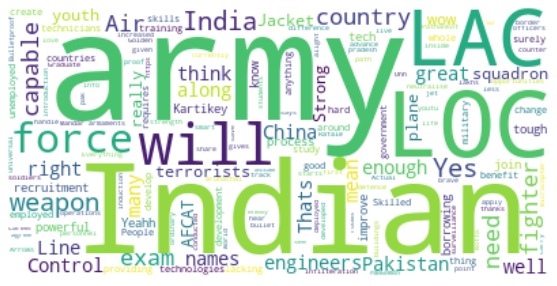

In [10]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 938 words in all the messages.
Author name Mandar K


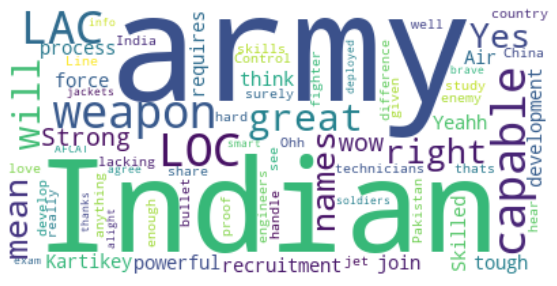

There are 396 words in all the messages.
Author name Vit Om Kakde


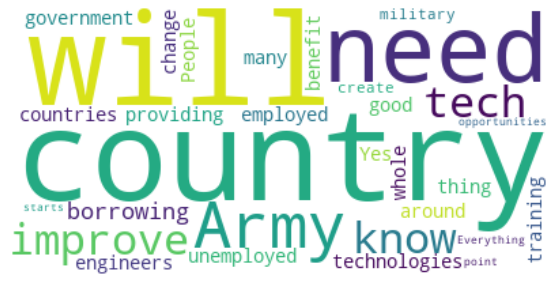

There are 1016 words in all the messages.
Author name Vit Kd


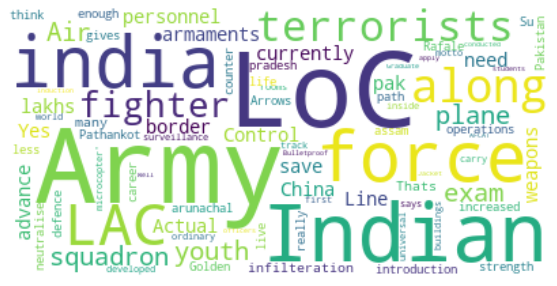

In [11]:
l = df["Author"].unique()
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    if(l[i]==None):
        continue;
    text = " ".join(review for review in dummy_df.Message)
    print ("There are {} words in all the messages.".format(len(text)))
    stopwords = set(STOPWORDS)
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [19]:
import PyPDF2
pdfFileObj = open('ak47.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
print(pdfReader.numPages)
pageObj = pdfReader.getPage(0)
print(pageObj.extractText())
pdfFileObj.close()

1
Weapon Identi˜cation Sheet
Compiled by the Small Arms Survey with the technical assistance of the National Firearms Centre, Royal Armouries, United Kingdom. For further 
information or if you have identi˜cation queries, contact weaponsID@smallarmssurvey.org or call: +41 22 908 5777. This identi˜cation sheet may be 
downloaded in printable PDF format at www.smallarmssurvey.org/weaponsID 
 Make a full and informed appraisal of the local security situation before conducting any research related to small arms and light weapons. 
Kalashnikov AK-47 
 (& close derivatives)
TYPE:
 ASSAULT RIFLE      
ALSO REFERRED TO AS:
 KALASHNIKOV/AK
Model illustrated: AK-47, Bulgaria
Technical Information
Calibre
7.62 x 39 mm M1943Length
Fixed stock: 880 mm

Folding stock:

Œ Extended: 880 mm

Œ Folded: 645 mm
Weight (unloaded)
AK-47: 3.725 kg

AK-47S: 3.980 kg
Barrel length
417 mmFeed device
30-round detachable box 

magazineSighting systems
Fore: Post, adjustable

Rear: U-notch tangent
Operating system

In [20]:
f = open("test2.txt", "a" , encoding='utf-8')
f.write(pageObj.extractText())
f.close()

In [21]:
f = open("test2.txt", "r")
print(f.read())

Weapon IdentiËœcation Sheet
Compiled by the Small Arms Survey with the technical assistance of the National Firearms Centre, Royal Armouries, United Kingdom. For further 
information or if you have identiËœcation queries, contact weaponsID@smallarmssurvey.org or call: +41 22 908 5777. This identiËœcation sheet may be 
downloaded in printable PDF format at www.smallarmssurvey.org/weaponsID 
 Make a full and informed appraisal of the local security situation before conducting any research related to small arms and light weapons. 
Kalashnikov AK-47 
 (& close derivatives)
TYPE:
 ASSAULT RIFLE      
ALSO REFERRED TO AS:
 KALASHNIKOV/AK
Model illustrated: AK-47, Bulgaria
Technical Information
Calibre
7.62 x 39 mm M1943Length
Fixed stock: 880 mm

Folding stock:

Å’ Extended: 880 mm

Å’ Folded: 645 mm
Weight (unloaded)
AK-47: 3.725 kg

AK-47S: 3.980 kg
Barrel length
417 mmFeed device
30-round detachable box 

magazineSighting systems
Fore: Post, adjustable

Rear: U-notch tangent
Operating sys

In [22]:
from os import path
import speech_recognition as sr
from pydub import AudioSegment
recognizer = sr.Recognizer()

with sr.AudioFile("audio_file.wav") as source:
    recorded_audio = recognizer.listen(source)
    print("Done recording")
try:
    print("Recognizing the text")
    text = recognizer.recognize_google(
            recorded_audio, 
            language="en-US"       
        )
    print("Decoded Text : {}".format(text))

except Exception as ex:
    print(ex)

Done recording
Recognizing the text
Decoded Text : I am a failure sorry I'm sorry for long time


In [23]:
from __future__ import absolute_import
from __future__  import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import cv2
import numpy as np
import os
from PIL import Image
from io import BytesIO
import time

import getpass

In [24]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4423442403992958804
]


In [25]:
def mamon_videoFightModel2(tf,wight='mamonbest947oscombo.hdfs'):
    layers = tf.keras.layers
    models = tf.keras.models
    losses = tf.keras.losses
    optimizers = tf.keras.optimizers
    metrics = tf.keras.metrics
    num_classes = 2
    cnn = models.Sequential()
    input_shapes=(160,160,3)
    np.random.seed(1234)
    vg19 = tf.keras.applications.vgg19.VGG19
    base_model = vg19(include_top=False,weights='imagenet',input_shape=(160, 160,3))

    cnn = models.Sequential()
    cnn.add(base_model)
    cnn.add(layers.Flatten())
    model = models.Sequential()

    model.add(layers.TimeDistributed(cnn,  input_shape=(30, 160, 160, 3)))
    model.add(layers.LSTM(30 , return_sequences= True))

    model.add(layers.TimeDistributed(layers.Dense(90)))
    model.add(layers.Dropout(0.1))

    model.add(layers.GlobalAveragePooling1D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(num_classes, activation="sigmoid"))

    adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.load_weights(wight)
    rms = optimizers.RMSprop()

    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

    return model


In [26]:
import numpy as np
from skimage.transform import resize
np.random.seed(1234)
import tensorflow as tf
import keras
model22 = mamon_videoFightModel2(tf)


Using TensorFlow backend.


In [27]:
def video_mamonreader(cv2,filename):
    frames = np.zeros((30, 160, 160, 3), dtype=np.float)
    i=0
    print(frames.shape)
    vc = cv2.VideoCapture(filename)
    if vc.isOpened():
        rval , frame = vc.read()
    else:
        rval = False
    frm = resize(frame,(160,160,3))
    frm = np.expand_dims(frm,axis=0)
    if(np.max(frm)>1):
        frm = frm/255.0
    frames[i][:] = frm
    i +=1
    print("reading video")
    while i < 30:
        rval, frame = vc.read()
        frm = resize(frame,(160,160,3))
        frm = np.expand_dims(frm,axis=0)
        if(np.max(frm)>1):
            frm = frm/255.0
        frames[i][:] = frm
        i +=1
    return frames

In [28]:
def pred_fight(model,video,acuracy=0.9):
    pred_test = model.predict(video)
    if pred_test[0][1] >=acuracy:
        return True , pred_test[0][1]
    else:
        return False , pred_test[0][1]

In [29]:
def main_fight(vidoss):
    vid = video_mamonreader(cv2,vidoss)
    datav = np.zeros((1, 30, 160, 160, 3), dtype=np.float)
    datav[0][:][:] = vid
    millis = int(round(time.time() * 1000))
    print(millis)
    f , precent = pred_fight(model22,datav,acuracy=0.65)
    millis2 = int(round(time.time() * 1000))
    print(millis2)
    res_mamon = {'fight':f , 'percentegeoffight':str(precent)}
    res_mamon['processing_time'] =  str(millis2-millis)
    return res_mamon

In [30]:
import pytube
from pytube import YouTube
import time

In [31]:
tot_link = np.count_nonzero(messages_df['urlcount'])
link_list = messages_df.loc[messages_df['urlcount']==1]
final_link = str(link_list['Message']).split()

In [32]:
final_link[3]

'https://youtu.be/FSM9k69RE0Y'

In [41]:
from __future__ import unicode_literals
import youtube_dl

ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([final_link[3]])

[youtube] FSM9k69RE0Y: Downloading webpage
[download] Toy Guns and Equipments - M4 Rifle - Desert Eagle - Different Uzi and Scary Mask-FSM9k69RE0Y.mp4 has already been downloaded
[download] 100% of 62.47MiB


In [33]:
res = main_fight('C:/Users/user/EDI_sem2/Toy Guns and Equipments - M4 Rifle - Desert Eagle - Different Uzi and Scary Mask-FSM9k69RE0Y.mp4')

(30, 160, 160, 3)
reading video
1623499968483
1623499973431


In [34]:
res

{'fight': True, 'percentegeoffight': '0.9728403', 'processing_time': '4948'}

In [35]:
import os
from twilio.rest import Client

In [37]:
from PIL import Image
from pytesseract import pytesseract

In [38]:
from PIL import Image
from pytesseract import pytesseract

path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
image_path = r"C:\Users\user\EDI_sem2\name.jpg"
img = Image.open(image_path)
pytesseract.tesseract_cmd = path_to_tesseract
text = pytesseract.image_to_string(img)
print(text[:-1])

Example:

©My favorite painting is “The Weeping
Woman” by Pablo Picasso, which is an
intriguing painting that symbolizes
suffering. As a result, | love bright

| primary colors, so | wear a lot of

| shocking yellows, blues, and reds. Also,
as an outgoing person, | enjoy
performing for large crowds. In the
end, people should not judge an
artist’s talent based on one standard
